In [20]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
import numpy as np
import sys
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

sys.path.append("../Lib")
from neuralnetwork import regression
from imbalanced import balance_score,upsample,undersample

In [22]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

# Data

In [23]:
data_all=np.load('..\Data\data_ct_age_np.npy')

In [24]:
np.random.shuffle(data_all)
features_all=data_all[:,0:-1]
label_all=data_all[:,-1]

In [25]:
features_all=(features_all-np.min(features_all,axis=0))/(np.max(features_all,axis=0)-np.min(features_all,axis=0))

In [26]:
num_sample=data_all.shape[0]
num_train=int(num_sample*0.8)
num_test=num_sample-num_train
train_X=features_all[0:num_train,:]
train_y=label_all[0:num_train]
test_X=features_all[num_train:,:]
test_y=label_all[num_train:]

## LR

In [27]:
reg = LinearRegression().fit(train_X, train_y)

In [28]:
reg.score(train_X, train_y)

0.40040261589675974

In [29]:
result_test=reg.predict(test_X)

In [30]:
result_test

array([51.86382892, 57.94499887, 55.73489261, ..., 54.80760381,
       56.4811581 , 55.15429419])

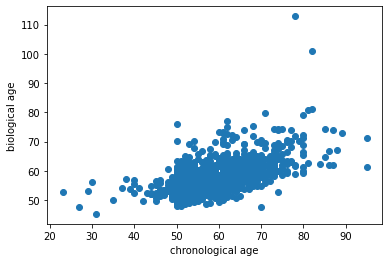

In [31]:
plt.scatter(test_y,result_test)
plt.xlabel('chronological age')
plt.ylabel('biological age')
plt.show()

## NN

In [32]:
age_predictor=regression(dim=11)

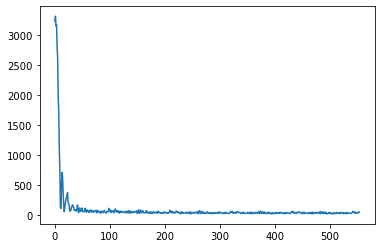

In [33]:
losses=age_predictor.train(train_X,train_y,lr=1e-2,iter=500)
plt.plot(losses)

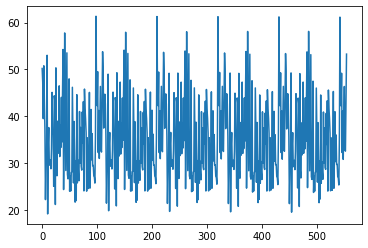

In [34]:
losses=age_predictor.train(train_X,train_y,lr=1e-4,iter=500)
plt.plot(losses)

In [35]:
result_test=age_predictor.predict(test_X)

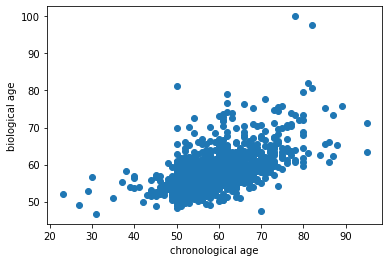

In [36]:
plt.scatter(test_y,result_test)
plt.xlabel('chronological age')
plt.ylabel('biological age')
plt.show()